In [138]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re

%matplotlib inline

In [139]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
y_test = pd.read_csv("gender_submission.csv")

In [140]:
df = pd.concat([train, test]).reset_index()

In [141]:
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        1309 non-null   int64  
 1   PassengerId  1309 non-null   int64  
 2   Survived     891 non-null    float64
 3   Pclass       1309 non-null   int64  
 4   Name         1309 non-null   object 
 5   Sex          1309 non-null   object 
 6   Age          1046 non-null   float64
 7   SibSp        1309 non-null   int64  
 8   Parch        1309 non-null   int64  
 9   Ticket       1309 non-null   object 
 10  Fare         1308 non-null   float64
 11  Cabin        295 non-null    object 
 12  Embarked     1307 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


In [143]:
df.drop(columns='PassengerId', inplace=True)

### Dealing with missing values

In [144]:
df.isna().sum()

index          0
Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

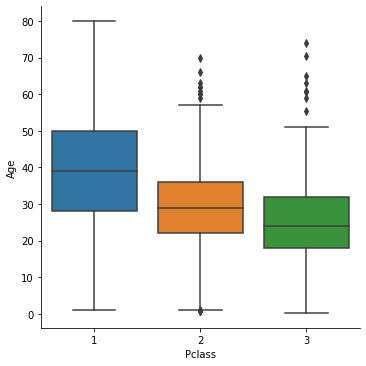

In [145]:
sns.catplot(x="Pclass", y="Age", kind="box", data=df)

In [146]:
means = df.groupby(['Pclass'])['Age'].median()
df = df.set_index(['Pclass'])
df['Age'] = df['Age'].fillna(means)
df = df.reset_index()

In [147]:
df['Cabin'].isna().sum() / df.shape[0]
#Too musch missed values in Cabin column ~ 77.46%

0.774637127578304

In [148]:
df.drop(columns='Cabin', inplace=True)

In [149]:
df[['Age', 'Fare']].describe()

,Age,Fare
count,1309.000000,1308.000000
mean,29.207540,33.295479
std,13.172381,51.758668
min,0.170000,0.000000
25%,22.000000,7.895800
50%,26.000000,14.454200
75%,37.000000,31.275000
max,80.000000,512.329200


In [150]:
df.Fare.fillna(df.Fare.median(), inplace=True)

<AxesSubplot:xlabel='Embarked', ylabel='Pclass'>

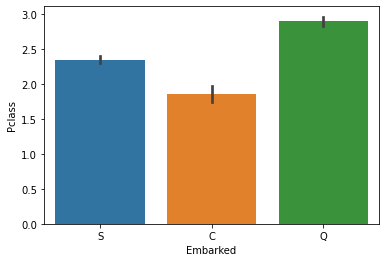

In [151]:
sns.barplot(x="Embarked", y="Pclass", data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

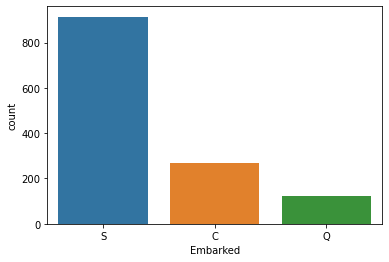

In [152]:
sns.countplot(x='Embarked', data=df)

In [153]:
df.Embarked = df.Embarked.fillna('C')
#Most of the C from higher classes, we have missed 1st class

In [154]:
df.isna().sum()

Pclass        0
index         0
Survived    418
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

### Feature Engineering 

Extract from name status (Mr., Mrs., e.t.c.)

In [155]:
df['Status'] = df['Name'].apply(lambda row: re.findall(r',\s(.*?)\.', row)[0])
df['Status'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [156]:
df.head()

,Pclass,index,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Status
0,3,0,0.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,2,1.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,3,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,3,4,0.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [157]:
df.nunique()
#index, Name and Ticket non informative column

Pclass         3
index        891
Survived       2
Name        1307
Sex            2
Age           98
SibSp          7
Parch          8
Ticket       929
Fare         281
Embarked       3
Status        18
dtype: int64

In [158]:
df.drop(columns=['index', 'Name', 'Ticket'], inplace=True)

In [159]:
df.head()

,Pclass,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Status
0,3,0.0,male,22.0,1,0,7.2500,S,Mr
1,1,1.0,female,38.0,1,0,71.2833,C,Mrs
2,3,1.0,female,26.0,0,0,7.9250,S,Miss
3,1,1.0,female,35.0,1,0,53.1000,S,Mrs
4,3,0.0,male,35.0,0,0,8.0500,S,Mr


Let's Encode categorical features

In [160]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["Sex"] = le.fit_transform(df["Sex"])
df.head()

,Pclass,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Status
0,3,0.0,1,22.0,1,0,7.2500,S,Mr
1,1,1.0,0,38.0,1,0,71.2833,C,Mrs
2,3,1.0,0,26.0,0,0,7.9250,S,Miss
3,1,1.0,0,35.0,1,0,53.1000,S,Mrs
4,3,0.0,1,35.0,0,0,8.0500,S,Mr


In [161]:
df["Embarked"] = le.fit_transform(df["Embarked"])
df["Status"] = le.fit_transform(df["Status"])

In [162]:
df.head()

,Pclass,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Status
0,3,0.0,1,22.0,1,0,7.2500,2,12
1,1,1.0,0,38.0,1,0,71.2833,0,13
2,3,1.0,0,26.0,0,0,7.9250,2,9
3,1,1.0,0,35.0,1,0,53.1000,2,13
4,3,0.0,1,35.0,0,0,8.0500,2,12


<AxesSubplot:xlabel='Status', ylabel='count'>

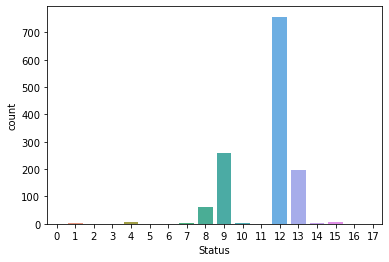

In [163]:
sns.countplot(x='Status', data=df)

In [164]:
def fix_status(col):
    if col == 12:
        return 1
    else:
        return 0

In [165]:
df['Status'] = df['Status'].apply(fix_status)

<AxesSubplot:xlabel='Status', ylabel='count'>

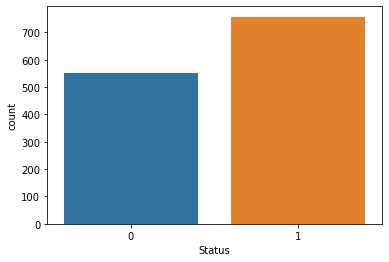

In [166]:
sns.countplot(x='Status', data=df)

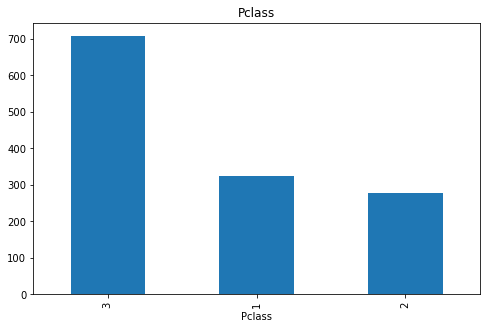

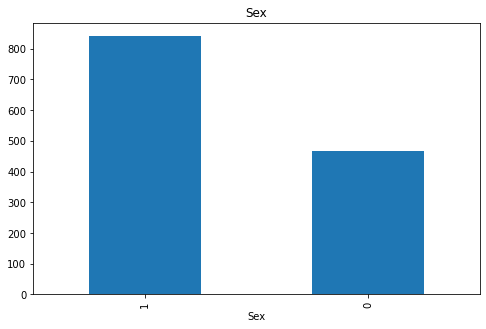

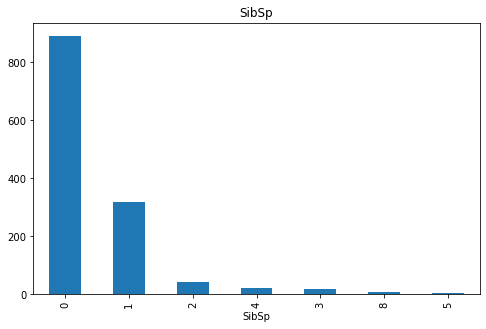

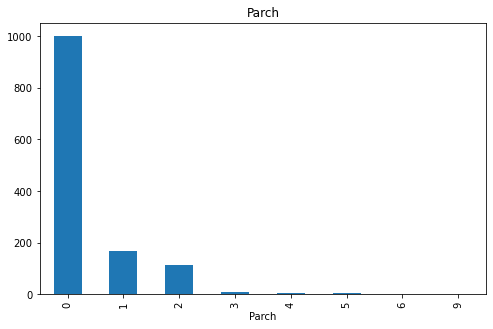

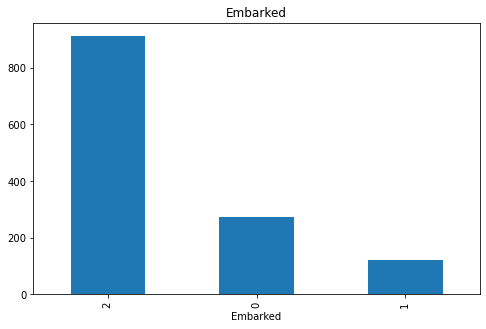

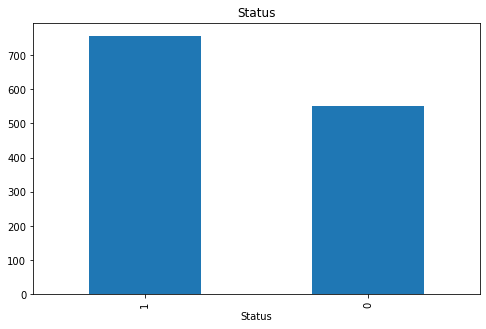

In [167]:
for col in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Status']:
    df[col].value_counts().plot(kind='bar', figsize=(8,5))
    plt.xlabel(col)
    plt.title(col)
    plt.show()

In [168]:
def fix_sibsp(col):
    if col == 0:
        return 0
    else:
        return 1

In [169]:
df['SibSp'] = df['SibSp'].apply(fix_sibsp)

In [170]:
df['Parch'] = df['Parch'].apply(fix_sibsp)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

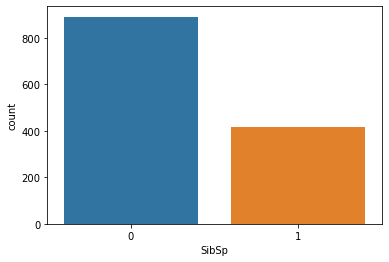

In [171]:
sns.countplot(x='SibSp', data=df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

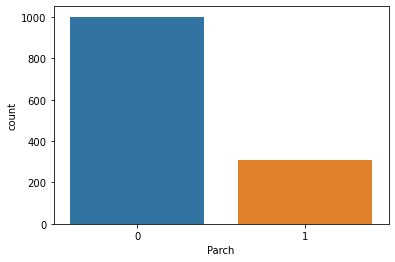

In [172]:
sns.countplot(x='Parch', data=df)

<AxesSubplot:>

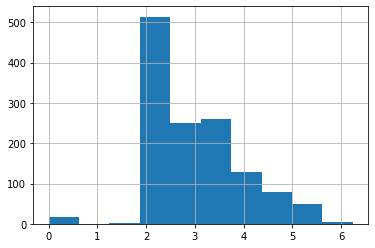

In [177]:
df['Fare'].hist()
#Too much skewed

In [176]:
df['Fare'] = np.log(df['Fare']+1)

# Model

In [231]:
y_train = df.loc[:890, 'Survived']
X_train = df.loc[:890, :].drop('Survived', axis=1)
X_test = df.loc[891:, :].drop('Survived', axis=1)

In [258]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [233]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

### Random Forest

In [269]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [247]:
parameters_grid = {
    'max_features' : ['auto', 'sqrt', 'log2'],
    'n_estimators' : np.arange(200,  1001, 200),
    'min_samples_leaf' : np.arange(1,6, 1)
}

In [248]:
cv = model_selection.ShuffleSplit(n_splits=10, test_size = 0.2, random_state = 0)

In [249]:
rf_model = model_selection.GridSearchCV(rf, parameters_grid, cv = cv)

In [250]:
%%time
rf_model.fit(X_train, y_train)

Wall time: 10min 12s


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 200,  400,  600,  800, 1000])})

In [252]:
rf_model.best_params_

{'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 800}

In [255]:
y_train

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [256]:
y_pred = rf_model.predict(X_test)

In [267]:
test['Survived'] = y_pred.astype('int')

In [268]:
rf_answer = test[['PassengerId', 'Survived']]
rf_answer.to_csv("rf_answer.csv", index=False)

### Gradient Boosting

In [276]:
gb.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [306]:
parameters_grid = {
#     'learning_rate' : np.linspace(0.01, 0.1, 5),
    'n_estimators' : np.arange(200,  1001, 200),
#     'max_depth' : np.arange(3,  7, 1),
    'min_samples_leaf' : np.arange(1,6, 1),
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [307]:
cv = model_selection.ShuffleSplit(n_splits=10, test_size = 0.2, random_state = 0)

In [308]:
gb_model = model_selection.GridSearchCV(gb, parameters_grid, cv = cv)

In [309]:
%%time
gb_model.fit(X_train, y_train)

Wall time: 5min 40s


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=GradientBoostingClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 200,  400,  600,  800, 1000])})

In [300]:
gb_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'n_estimators': 400}

In [301]:
y_pred = gb_model.predict(X_test)

In [302]:
test.drop('Survived', axis=1, inplace=True)

In [303]:
test['Survived'] = y_pred.astype('int')

In [304]:
answer = test[['PassengerId', 'Survived']]

In [305]:
answer.to_csv('answer_gb_new.csv', index=False)